In [4]:
# ============================================================
# FUSION DES DEUX SOURCES MÉTÉO
# Création de meteo.csv
# ============================================================

import pandas as pd

# Chargement des deux fichiers météo
df_merge = pd.read_csv("merged.csv")
df_result = pd.read_csv("result.csv")

print("merge.csv :", df_merge.shape)
print("result.csv :", df_result.shape)

# Harmonisation éventuelle d'une faute courante
if "perspitation" in df_merge.columns:
    df_merge = df_merge.rename(columns={"perspitation": "percipitation"})

# ============================================================
# FUSION SUR Num_Acc
# ============================================================

df_meteo = pd.merge(
    df_merge,
    df_result,
    on="Num_Acc",
    how="outer",
    suffixes=("_merge", "_api")
)

print("\nDataset météo fusionné :", df_meteo.shape)
display(df_meteo.head())

# ============================================================
# SAUVEGARDE
# ============================================================

df_meteo.to_csv("meteo.csv", index=False)

print("\n✔ Fichier meteo.csv créé avec succès")


merge.csv : (110124, 12)
result.csv : (110124, 6)

Dataset météo fusionné : (110124, 17)


Num_Acc                 date_merge         temperature  \
0  202200000001  2022-10-19T16:15:00+02:00   22.77777777777778   
1  202200000002  2022-10-20T08:34:00+02:00  12.222222222222221   
2  202200000003  2022-10-20T17:15:00+02:00  19.444444444444443   
3  202200000004  2022-10-20T18:00:00+02:00   16.11111111111111   
4  202200000005  2022-10-19T11:45:00+02:00   16.11111111111111   

            dew_point  humidity percipitation_merge wind wind_speed wind_gust  \
0  15.555555555555555       NaN                 0.0    S        8.0       0.0   
1  10.555555555555555       NaN                 0.0   SW        5.0       0.0   
2  11.666666666666666       NaN                 0.0   SE        9.0      16.0   
3                15.0       NaN                 0.0   SE        6.0       0.0   
4   16.11111111111111       NaN                 0.0   NE        6.0       0.0   

                 pressure visibility_merge condition  \
0               0.0002986              NaN       NaN   
1               0.0002775              NaN       NaN   
2  0.00029190000000000005              NaN      Fair   
3               0.0002972              NaN      Fair   
4  0.00030100000000000005                6       Fog   

                    date_api  percipitation_api  visibility_api      sol  \
0  2022-10-19 16:00:00+00:00                0.0         20000.0        0   
1  2022-10-20 08:00:00+00:00                0.0            -1.0  inconnu   
2  2022-10-20 17:00:00+00:00                0.0         20000.0        0   
3  2022-10-20 18:00:00+00:00                0.0         46349.0  inconnu   
4  2022-10-19 11:00:00+00:00                0.0         56130.0  inconnu   

     solng  
0  inconnu  
1  inconnu  
2  inconnu  
3  inconnu  
4  inconnu


✔ Fichier meteo.csv créé avec succès


In [6]:
# ============================================================
# VÉRIFICATION DE LA VARIABLE ATM (BDD ACCIDENTS)
# ============================================================

import pandas as pd
import numpy as np

df_acc = pd.read_csv("accident_pretraiter.csv", sep=";")

print("Shape accidents :", df_acc.shape)

print("\nValeurs uniques de 'atm' :")
print(np.unique(df_acc["atm"].astype(str)))


Shape accidents : (110124, 33)

Valeurs uniques de 'atm' :
['autre_meteo' 'brouillard_fumee' 'neige_grele' 'normales' 'pluie'
 'vent_fort' 'visibilite_degradee']


In [7]:
# ============================================================
# CRÉATION DU DATASET MÉTÉO NETTOYÉ
# ============================================================

df_meteo = pd.read_csv("meteo.csv")

# Colonnes météo retenues
cols_meteo_keep = [
    "Num_Acc",
    "temperature",
    "wind_speed",
    "pressure",
    "percipitation_api",
    "visibility_api",
    "sol"
]

# Sélection
df_meteo_clean = df_meteo[cols_meteo_keep].copy()

print("Shape météo nettoyée :", df_meteo_clean.shape)
display(df_meteo_clean.head())

# Sauvegarde
df_meteo_clean.to_csv("meteo_clean.csv", index=False)

print("\n✔ Fichier meteo_clean.csv créé avec succès")


Shape météo nettoyée : (110124, 7)


Num_Acc         temperature wind_speed                pressure  \
0  202200000001   22.77777777777778        8.0               0.0002986   
1  202200000002  12.222222222222221        5.0               0.0002775   
2  202200000003  19.444444444444443        9.0  0.00029190000000000005   
3  202200000004   16.11111111111111        6.0               0.0002972   
4  202200000005   16.11111111111111        6.0  0.00030100000000000005   

   percipitation_api  visibility_api      sol  
0                0.0         20000.0        0  
1                0.0            -1.0  inconnu  
2                0.0         20000.0        0  
3                0.0         46349.0  inconnu  
4                0.0         56130.0  inconnu


✔ Fichier meteo_clean.csv créé avec succès


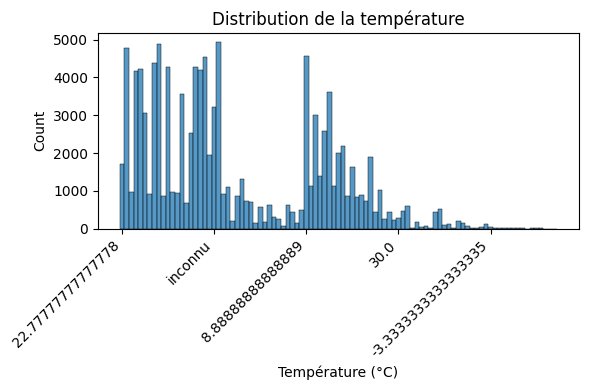

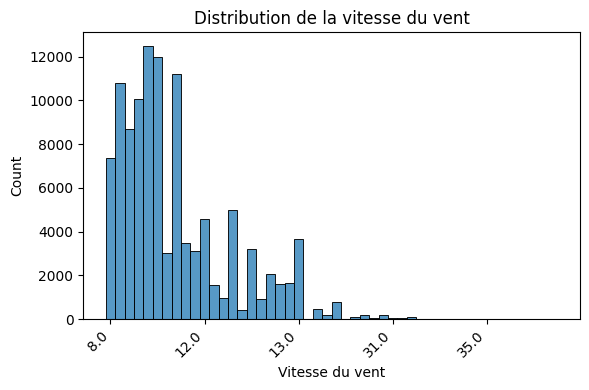

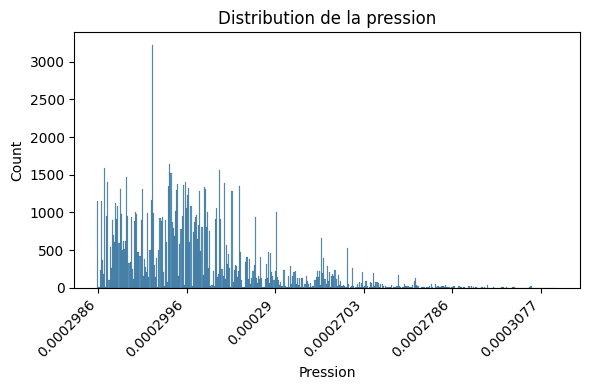

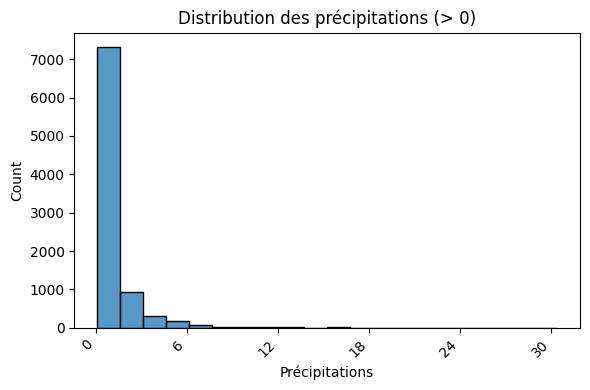

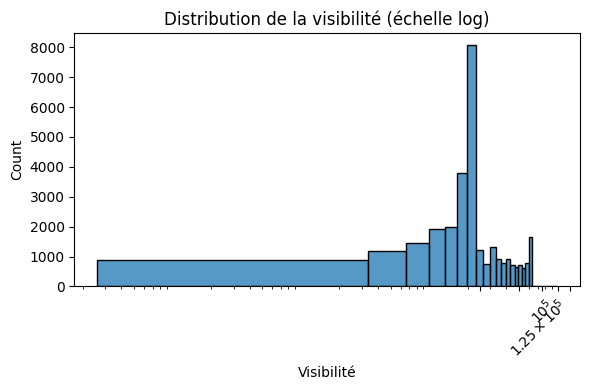

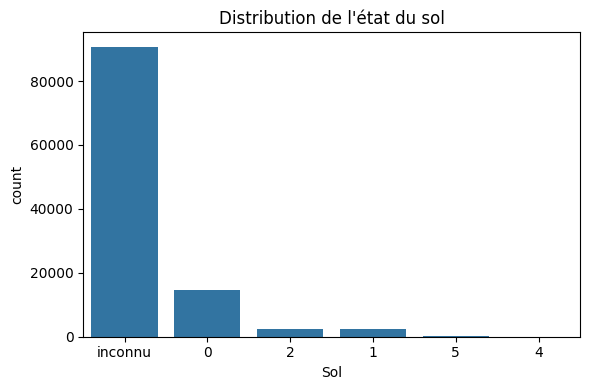

In [11]:
# ============================================================
# DISTRIBUTIONS MÉTÉO — AXES LISIBLES
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

df = df_meteo_clean.copy()

def clean_axis(ax, rotation=45, max_ticks=6):
    ax.xaxis.set_major_locator(ticker.MaxNLocator(max_ticks))
    for label in ax.get_xticklabels():
        label.set_rotation(rotation)
        label.set_ha("right")

# ============================================================
# TEMPÉRATURE
# ============================================================

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df["temperature"], bins=30, ax=ax)
ax.set_title("Distribution de la température")
ax.set_xlabel("Température (°C)")
clean_axis(ax)
plt.tight_layout()
plt.show()

# ============================================================
# VITESSE DU VENT
# ============================================================

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df["wind_speed"], bins=25, ax=ax)
ax.set_title("Distribution de la vitesse du vent")
ax.set_xlabel("Vitesse du vent")
clean_axis(ax)
plt.tight_layout()
plt.show()

# ============================================================
# PRESSION
# ============================================================

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(df["pressure"], bins=30, ax=ax)
ax.set_title("Distribution de la pression")
ax.set_xlabel("Pression")
clean_axis(ax)
plt.tight_layout()
plt.show()

# ============================================================
# PRÉCIPITATIONS (> 0)
# ============================================================

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(
    df.loc[df["percipitation_api"] > 0, "percipitation_api"],
    bins=20,
    ax=ax
)
ax.set_title("Distribution des précipitations (> 0)")
ax.set_xlabel("Précipitations")
clean_axis(ax)
plt.tight_layout()
plt.show()

# ============================================================
# VISIBILITÉ (> 0, log-scale)
# ============================================================

visibility_clean = df["visibility_api"][df["visibility_api"] > 0]

fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(visibility_clean, bins=30, ax=ax)
ax.set_xscale("log")
ax.set_title("Distribution de la visibilité (échelle log)")
ax.set_xlabel("Visibilité")
clean_axis(ax)
plt.tight_layout()
plt.show()

# ============================================================
# SOL (catégorielle)
# ============================================================

fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(
    data=df,
    x="sol",
    order=df["sol"].value_counts().index,
    ax=ax
)
ax.set_title("Distribution de l'état du sol")
ax.set_xlabel("Sol")
plt.tight_layout()
plt.show()


In [13]:
# ============================================================
# ANALYSE DES OUTLIERS PAR QUANTILES (VERSION ROBUSTE)
# ============================================================

import pandas as pd
import numpy as np

# Chargement
df = pd.read_csv("meteo_clean.csv")

# Variables à analyser
features = [
    "temperature",
    "wind_speed",
    "pressure",
    "visibility_api"
]

# Quantiles à tester
quantile_list = [0.005, 0.01, 0.025, 0.05]

results = []

for feature in features:
    # 🔒 Forcer en numérique + gestion des erreurs
    data = pd.to_numeric(df[feature], errors="coerce")
    
    # -1 considéré comme manquant
    data = data.replace(-1, np.nan).dropna()
    
    for q in quantile_list:
        q_low = data.quantile(q)
        q_high = data.quantile(1 - q)
        
        below = data[data < q_low]
        above = data[data > q_high]
        
        row = {
            "feature": feature,
            "quantile": q,
            "borne_inf": q_low,
            "borne_sup": q_high,
            "median_inf": below.median() if len(below) > 0 else np.nan,
            "median_sup": above.median() if len(above) > 0 else np.nan,
            "nb_inf": len(below),
            "nb_sup": len(above)
        }
        
        results.append(row)

outliers_summary_df = pd.DataFrame(results)

display(outliers_summary_df)


feature  quantile    borne_inf     borne_sup   median_inf  \
0      temperature     0.005   -17.777778     32.777778          NaN   
1      temperature     0.010    -5.000000     31.111111   -17.777778   
2      temperature     0.025    -1.666667     27.777778    -3.888889   
3      temperature     0.050     0.555556     25.555556    -1.666667   
4       wind_speed     0.005     0.000000     25.000000          NaN   
5       wind_speed     0.010     0.000000     22.000000          NaN   
6       wind_speed     0.025     0.000000     20.000000          NaN   
7       wind_speed     0.050     1.000000     16.000000     0.000000   
8         pressure     0.005     0.000000      0.000304          NaN   
9         pressure     0.010     0.000270      0.000304     0.000000   
10        pressure     0.025     0.000281      0.000303     0.000271   
11        pressure     0.050     0.000287      0.000302     0.000281   
12  visibility_api     0.005   241.365000  60000.000000   157.000000   
13  visibility_api     0.010   649.640000  60000.000000   240.000000   
14  visibility_api     0.025  2883.550000  60000.000000  1078.000000   
15  visibility_api     0.050  5177.000000  59797.000000  2882.000000   

      median_sup  nb_inf  nb_sup  
0      34.444444       0     462  
1      33.055556    1031     924  
2      30.555556    2632    2551  
3      27.777778    5274    5223  
4      29.000000       0     510  
5      25.000000       0    1063  
6      23.000000       0    1939  
7      20.000000    3460    4634  
8       0.000305       0     530  
9       0.000305    1064     996  
10      0.000304    2661    2619  
11      0.000303    5334    5307  
12  75000.000000     152       4  
13  75000.000000     303       4  
14  75000.000000     758       4  
15  60000.000000    1513    1513

In [14]:
# ============================================================
# TRAITEMENT DES OUTLIERS (CLIPPING PAR MÉDIANE)
# + SUPPRESSION DES COLONNES NON UTILISÉES
# ============================================================

import pandas as pd
import numpy as np

# Chargement
df = pd.read_csv("meteo_clean.csv")

# ============================================================
# PARAMÈTRES DE TRAITEMENT
# ============================================================

quantiles = {
    "temperature": 0.025,
    "wind_speed": 0.025,
    "pressure": 0.05,
    "visibility_api": 0.005
}

features_to_process = list(quantiles.keys())

# ============================================================
# APPLICATION DU CLIPPING
# ============================================================

df_out = df.copy()

for feature, q in quantiles.items():
    
    # Forcer numérique + NaN
    data = pd.to_numeric(df_out[feature], errors="coerce")
    data = data.replace(-1, np.nan)
    
    # Quantiles
    q_low = data.quantile(q)
    q_high = data.quantile(1 - q)
    
    # Valeurs extrêmes
    below = data[data < q_low]
    above = data[data > q_high]
    
    median_low = below.median()
    median_high = above.median()
    
    # Clipping par médiane
    data_clipped = data.copy()
    
    data_clipped[data < q_low] = median_low
    data_clipped[data > q_high] = median_high
    
    df_out[feature] = data_clipped

# ============================================================
# SUPPRESSION DES COLONNES NON UTILISÉES
# ============================================================

cols_to_drop = ["percipitation_api", "sol"]
df_out = df_out.drop(columns=cols_to_drop, errors="ignore")

print("Shape après traitement météo :", df_out.shape)
display(df_out.head())

# ============================================================
# SAUVEGARDE
# ============================================================

df_out.to_csv("meteo_preprocessed.csv", index=False)

print("\n✔ Fichier meteo_preprocessed.csv créé avec succès")


Shape après traitement météo : (110124, 5)


Num_Acc  temperature  wind_speed  pressure  visibility_api
0  202200000001    22.777778         8.0  0.000299         20000.0
1  202200000002    12.222222         5.0  0.000281             NaN
2  202200000003    19.444444         9.0  0.000292         20000.0
3  202200000004    16.111111         6.0  0.000297         46349.0
4  202200000005    16.111111         6.0  0.000301         56130.0


✔ Fichier meteo_preprocessed.csv créé avec succès


In [15]:
# ============================================================
# ANALYSE DES VALEURS MANQUANTES
# ============================================================

import pandas as pd

df = pd.read_csv("meteo_preprocessed.csv")

nan_summary = pd.DataFrame({
    "nb_nan": df.isna().sum(),
    "pct_nan (%)": (df.isna().mean() * 100).round(2)
}).sort_values(by="pct_nan (%)", ascending=False)

display(nan_summary)


nb_nan  pct_nan (%)
visibility_api   79832        72.49
wind_speed        3226         2.93
temperature       3226         2.93
pressure          3226         2.93
Num_Acc              0         0.00

In [16]:
# ============================================================
# ANALYSE DES VALEURS MANQUANTES — VISIBILITY (merged.csv)
# ============================================================

import pandas as pd
import numpy as np

# Chargement
df_merged = pd.read_csv("merged.csv")

# Sélection visibility
visibility = pd.to_numeric(df_merged["visibility"], errors="coerce")

# Considérer -1 comme manquant si présent
visibility = visibility.replace(-1, np.nan)

# Calculs
nb_total = len(visibility)
nb_nan = visibility.isna().sum()
pct_nan = (nb_nan / nb_total) * 100

print(f"Nombre total d'observations : {nb_total}")
print(f"Nombre de valeurs manquantes : {nb_nan}")
print(f"Pourcentage de valeurs manquantes : {pct_nan:.2f} %")


Nombre total d'observations : 110124
Nombre de valeurs manquantes : 55035
Pourcentage de valeurs manquantes : 49.98 %


In [17]:
# ============================================================
# COMPLÉTION DE LA VISIBILITÉ (API ⟵ MERGED)
# ============================================================

import pandas as pd
import numpy as np

# Chargement des fichiers
df_meteo = pd.read_csv("meteo_preprocessed.csv")
df_merged = pd.read_csv("merged.csv")

# Sélection utile depuis merged
df_merged_vis = df_merged[["Num_Acc", "visibility"]].copy()

# Forcer visibility merged en numérique
df_merged_vis["visibility"] = pd.to_numeric(
    df_merged_vis["visibility"],
    errors="coerce"
).replace(-1, np.nan)

# Merge gauche
df_vis = df_meteo.merge(
    df_merged_vis,
    on="Num_Acc",
    how="left",
    suffixes=("_api", "_merged")
)

# Remplissage : API prioritaire, sinon merged
df_vis["visibility"] = df_vis["visibility_api"].fillna(df_vis["visibility"])

# Nettoyage
df_vis = df_vis.drop(columns=["visibility_api"])

# Vérification
print("NaN visibility après complétion :",
      df_vis["visibility"].isna().sum())

display(df_vis.head())

# Sauvegarde
df_vis.to_csv("meteo_visibility_completed.csv", index=False)

print("\n✔ Fichier meteo_visibility_completed.csv créé")


NaN visibility après complétion : 39270


Num_Acc  temperature  wind_speed  pressure  visibility
0  202200000001    22.777778         8.0  0.000299     20000.0
1  202200000002    12.222222         5.0  0.000281         NaN
2  202200000003    19.444444         9.0  0.000292     20000.0
3  202200000004    16.111111         6.0  0.000297     46349.0
4  202200000005    16.111111         6.0  0.000301     56130.0


✔ Fichier meteo_visibility_completed.csv créé


In [18]:
nan_summary = pd.DataFrame({
    "nb_nan": df_vis.isna().sum(),
    "pct_nan (%)": (df_vis.isna().mean() * 100).round(2)
}).sort_values(by="pct_nan (%)", ascending=False)

display(nan_summary)

nb_nan  pct_nan (%)
visibility    39270        35.66
wind_speed     3226         2.93
temperature    3226         2.93
pressure       3226         2.93
Num_Acc           0         0.00

In [19]:
# ============================================================
# MERGE ACCIDENTS + MÉTÉO (SANS SAUVEGARDE)
# ============================================================

import pandas as pd

# Chargement des datasets
df_acc = pd.read_csv("accident_pretraiter.csv", sep=";", encoding="utf-8")
df_meteo = pd.read_csv("meteo_visibility_completed.csv")

# Colonnes météo à ajouter
meteo_cols = [
    "Num_Acc",
    "visibility",
    "wind_speed",
    "temperature",
    "pressure"
]

df_meteo_sub = df_meteo[meteo_cols]

# Merge gauche (accidents = référence)
df_acc_meteo = df_acc.merge(
    df_meteo_sub,
    on="Num_Acc",
    how="left"
)

# Vérifications rapides
print("Shape accidents seul :", df_acc.shape)
print("Shape après ajout météo :", df_acc_meteo.shape)

print("\nNaN par variable météo ajoutée :")
display(df_acc_meteo[["visibility", "wind_speed", "temperature", "pressure"]].isna().sum())

display(df_acc_meteo.head())


Shape accidents seul : (110124, 33)
Shape après ajout météo : (110124, 37)

NaN par variable météo ajoutée :


visibility     39270
wind_speed      3226
temperature     3226
pressure        3226
dtype: int64

Num_Acc  jour  mois    an   hrmn            lat            long  \
0  202200000001    19    10  2022  16:15  44,5594200000    4,7257200000   
1  202200000002    20    10  2022  08:34  46,9258100000    6,3462000000   
2  202200000003    20    10  2022  17:15  48,4931620000   -2,7604390000   
3  202200000004    20    10  2022  18:00  45,6926520000   -0,3262900000   
4  202200000005    19    10  2022  11:45  43,6755790366    5,0927031775   

     com dep         lum  ... has_MD has_OTHER choc_multiple nb_usagers  \
0  26198  26  plein_jour  ...      1         0             0          2   
1  25204  25  plein_jour  ...      0         0             0          2   
2  22360  22  plein_jour  ...      0         0             0          2   
3  16102  16  plein_jour  ...      0         0             0          2   
4  13103  13  plein_jour  ...      0         0             0          2   

  grav_max age_moyen visibility wind_speed temperature  pressure  
0        3      44.0    20000.0        8.0   22.777778  0.000299  
1        4      43.0        NaN        5.0   12.222222  0.000281  
2        4      27.5    20000.0        9.0   19.444444  0.000292  
3        4      38.5    46349.0        6.0   16.111111  0.000297  
4        4      36.5    56130.0        6.0   16.111111  0.000301  

[5 rows x 37 columns]

In [20]:
# ============================================================
# IMPUTATION FINALE DES VARIABLES MÉTÉO
# - Temp / Wind / Pressure : médiane conditionnée à atm
# - Visibility : "inconnu" si NaN
# ============================================================

import pandas as pd
import numpy as np

df = df_acc_meteo.copy()

# ============================================================
# VARIABLES CONCERNÉES
# ============================================================

num_features = ["temperature", "wind_speed", "pressure"]

# ============================================================
# IMPUTATION PAR MÉDIANE CONDITIONNELLE À atm
# ============================================================

for feature in num_features:
    # Calcul des médianes par atm (sur valeurs non nulles)
    medians_by_atm = (
        df.groupby("atm")[feature]
        .median()
    )
    
    # Fonction d'imputation
    def impute_by_atm(row):
        if pd.isna(row[feature]):
            return medians_by_atm.get(row["atm"], np.nan)
        return row[feature]
    
    df[feature] = df.apply(impute_by_atm, axis=1)

# ============================================================
# VISIBILITY : NaN → "inconnu"
# ============================================================

df["visibility"] = df["visibility"].fillna("inconnu")

# ============================================================
# CONTRÔLES
# ============================================================

print("NaN restants après imputation :")
display(df[["temperature", "wind_speed", "pressure", "visibility"]].isna().sum())

print("\nAperçu final :")
display(df[[
    "atm",
    "temperature",
    "wind_speed",
    "pressure",
    "visibility"
]].head())


NaN restants après imputation :


temperature    0
wind_speed     0
pressure       0
visibility     0
dtype: int64


Aperçu final :


atm  temperature  wind_speed  pressure visibility
0             normales    22.777778         8.0  0.000299    20000.0
1             normales    12.222222         5.0  0.000281    inconnu
2             normales    19.444444         9.0  0.000292    20000.0
3  visibilite_degradee    16.111111         6.0  0.000297    46349.0
4             normales    16.111111         6.0  0.000301    56130.0

In [21]:
# ============================================================
# CONTRÔLE FINAL DES VALEURS MANQUANTES ET -1
# ============================================================

import numpy as np
import pandas as pd

cols_check = ["temperature", "wind_speed", "pressure", "visibility"]

summary = []

for col in cols_check:
    nb_nan = df[col].isna().sum()
    pct_nan = (nb_nan / len(df)) * 100
    
    nb_minus1 = (df[col] == -1).sum() if df[col].dtype != "object" else 0
    pct_minus1 = (nb_minus1 / len(df)) * 100
    
    summary.append({
        "variable": col,
        "nb_nan": nb_nan,
        "pct_nan (%)": round(pct_nan, 3),
        "nb_-1": nb_minus1,
        "pct_-1 (%)": round(pct_minus1, 3)
    })

check_df = pd.DataFrame(summary)

display(check_df)


variable  nb_nan  pct_nan (%)  nb_-1  pct_-1 (%)
0  temperature       0          0.0      0         0.0
1   wind_speed       0          0.0      0         0.0
2     pressure       0          0.0      0         0.0
3   visibility       0          0.0      0         0.0

In [22]:
# ============================================================
# SAUVEGARDE DU DATASET FINAL ACCIDENTS + MÉTÉO
# ============================================================

df.to_csv(
    "accident_meteo_final.csv",
    sep=";",
    index=False,
    encoding="utf-8"
)

print("✔ Fichier accident_meteo_final.csv sauvegardé avec succès")


✔ Fichier accident_meteo_final.csv sauvegardé avec succès
